# 2024 공동주택 매매가격지수 주간동향 리포트 자동화_Python PPTX

In [1]:
# !pip install python-pptx

In [2]:
from pptx import Presentation
import pandas as pd
import matplotlib.pyplot as plt
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
import os

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['font.family'] ='NanumGothic'

In [3]:
dict_days = dict(zip(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], 
                     ['월', '화', '수', '목', '금', '토', '일']
                    ))

## 주택매매가격지수 주간동향
### 데이터 불러오기

In [4]:
# Volumes per day
df_day = pd.read_csv('volumes per day.csv', index_col=0)
# Weeks
LIST_WEEKS = df_day['WEEK'].unique()
df_day.head()

,DATE,WEEK,DAY,ORDERS,LINES,PCS,SKU,CITIES
0,2017-01-02,WEEK-1,MON,776,1367,1595.0,487,174
1,2017-01-03,WEEK-1,TUE,902,1550,1861.0,547,188
2,2017-01-04,WEEK-1,WED,1476,2252,2856.0,513,205
3,2017-01-05,WEEK-1,THU,909,1637,1972.0,519,175
4,2017-01-06,WEEK-1,FRI,1023,1720,1995.0,502,189


### 주간 공동주택 매매가격지수 그래프 생성 함수

In [5]:
def analysis_week(df_day, WEEK):
    
    # Filter Scope
    df_plot = df_day[df_day['WEEK'] ==WEEK].copy()

    ''' Calculate KPIs for Comments'''
    # Lines per orders
    df_plot['LINES/ORDER'] = df_plot['LINES']/df_plot['ORDERS']
    avg_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].mean())
    max_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].max())

    # Maximum Day Lines
    busy_day = dict_days[df_plot.set_index('DAY')['LINES'].idxmax()]
    max_lines = '{:,} lines'.format(df_plot['LINES'].max())

    # Total 주택매매가격지수
    total_lines = '{:,} lines'.format(df_plot['LINES'].sum())

    # Bar Plot: Orders/Lines
    fig, ax = plt.subplots(figsize=(18, 6))
    df_plot.plot.bar(figsize=(12, 6), edgecolor='black', x='DAY', y=['ORDERS', 'LINES'], 
                     color=['tab:blue', 'navy'], legend= True, ax = ax)
    plt.xlabel('요일', fontsize = 12)
    plt.title('주간 공동주택 매매가격지수', fontsize = 16)
#     plt.show()

    # Save plot
    filename = WEEK + ".png"
    path_plot = filename
    fig.savefig(path_plot, dpi=fig.dpi)
    
    return avg_ratio, max_ratio, busy_day, max_lines, total_lines

## Number of Lines/Order (by Week)
### Import Data

In [6]:
# Volumes per day
df_lior = pd.read_csv('lines per day.csv', index_col=0)
COLS_IN = list(df_lior.columns[0:8])
df_lior.reset_index(inplace = True)
df_lior.head()

,WEEK,1,2,3,4,5,+
0,WEEK-1,5178,1265,501,304,162,494
1,WEEK-2,5930,1832,756,423,211,640
2,WEEK-3,5047,1490,717,360,176,550
3,WEEK-4,2681,753,283,190,105,301
4,WEEK-5,966,271,95,78,30,85


In [7]:
df_lior

,WEEK,1,2,3,4,5,+
0,WEEK-1,5178,1265,501,304,162,494
1,WEEK-2,5930,1832,756,423,211,640
2,WEEK-3,5047,1490,717,360,176,550
3,WEEK-4,2681,753,283,190,105,301
4,WEEK-5,966,271,95,78,30,85


In [9]:
def plot_split(df_lior):
    
    # Bar Plot: split per lines per orders
    fig, ax = plt.subplots(figsize=(18, 6))
    df_lior.plot.bar(figsize=(12, 6), edgecolor='black', x='WEEK', y=COLS_IN[0], color='tab:blue', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(12, 6), edgecolor='black', x='WEEK', y=COLS_IN[1], color='navy', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(12, 6), edgecolor='black', x='WEEK', y=COLS_IN[2], color='azure', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(12, 6), edgecolor='black', x='WEEK', y=COLS_IN[3], color='royalblue', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(12, 6), edgecolor='black', x='WEEK', y=COLS_IN[4], color='aqua', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(12, 6), edgecolor='black', x='WEEK', y=COLS_IN[5], color='lightblue', legend= True, ax = ax)
    plt.xlabel('주차', fontsize = 14)
    plt.ylabel('거래량', fontsize = 14)
    plt.title('월간 주택 거래량', fontsize = 14)
#     plt.show()

    # Save plot
    filename = 'SPLIT' + ".png"
    path_plot = filename
    fig.savefig(path_plot, dpi=fig.dpi)

    # Analysis
    orders = df_lior.sum(axis = 1).sum()
    total_orders = '{:,} orders'.format(orders)
    
    # Split full month
    df_an = pd.DataFrame(100 * df_lior.set_index('WEEK').sum(axis = 0)/orders)
    df_an.columns = ['%']
    LIST_ANALYSIS = []
    for l in df_an.index[0:3]:
        LIST_ANALYSIS.append('{} 지역이 전체 거래량의 {}%를 차지  '.format(df_an.loc[l, '%'].round(1), l))
        
        
    return total_orders, LIST_ANALYSIS

## PowerPoint 생성
> 두 번째 슬라이드에 대해 일부 블록을 반복하므로 이 코드 부분을 최적화 가능

<ipython-input-9-84606d18a448>:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  orders = df_lior.sum(axis = 1).sum()


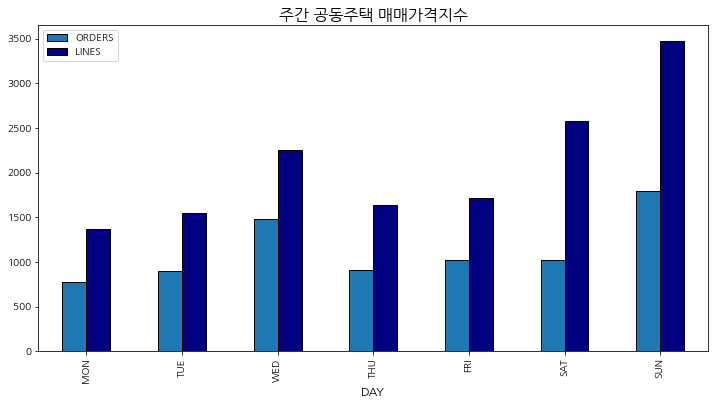

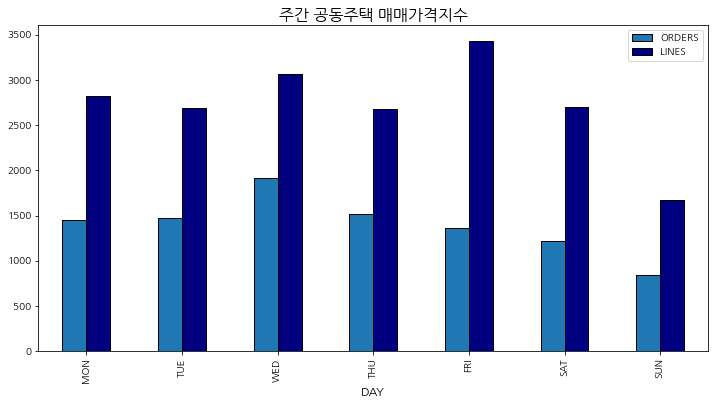

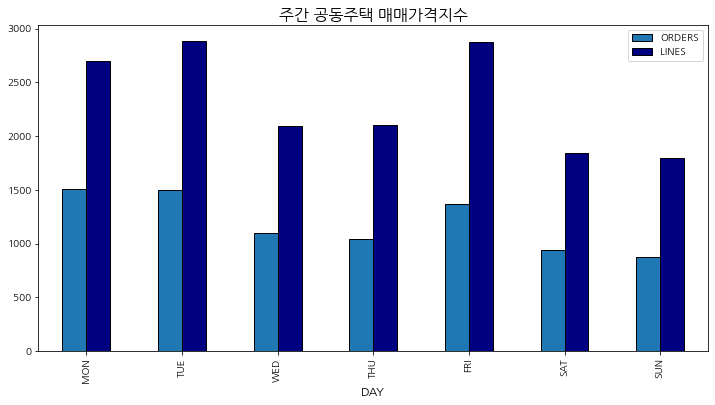

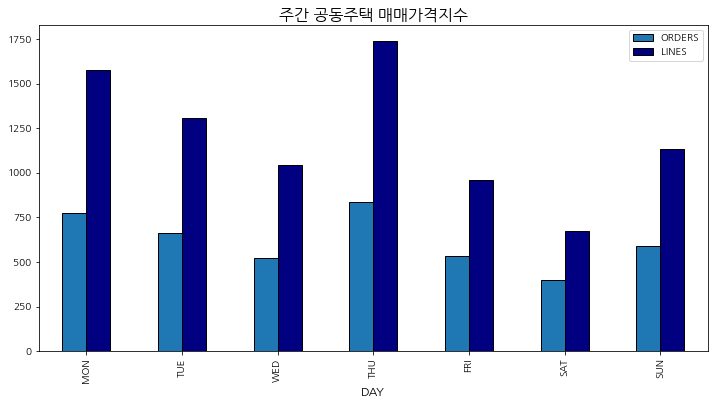

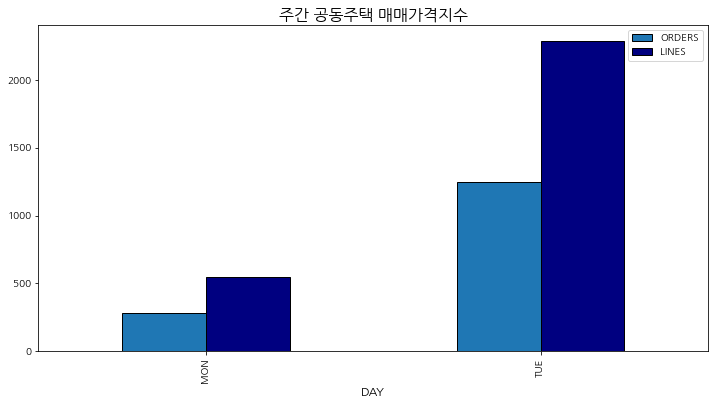

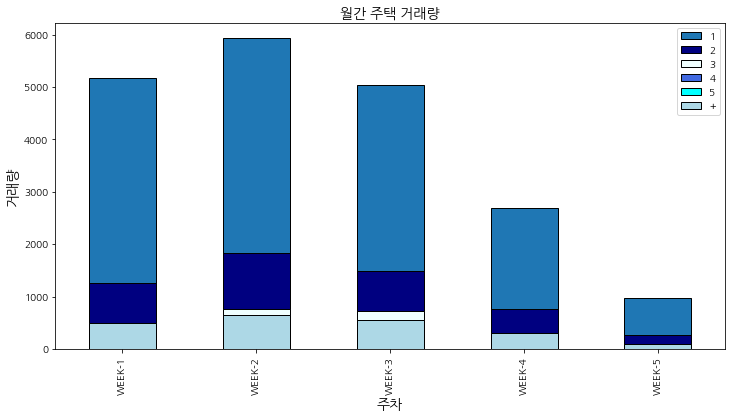

In [10]:
import pandas as pd
pd.options.mode.chained_assignment = None

# Create the presentation object
prs = Presentation()

# Layout Choice for the introduction slide
image_slide_layout = prs.slide_layouts[5]
page = 1

'''Slide Introduction'''
# Create the slide
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
background = slide.background
fill = background.fill
fill.solid()
fill.fore_color.rgb = RGBColor(35, 77, 160)

# Add Title
title.text = "2024 부동산 전망 리포트"
title.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)

# Add Subtitle
subtitle.text = 'python-pptx 활용 보고서 자동화 \n for the last {} weeks'.format(len(LIST_WEEKS))
subtitle.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)

'''Slides Analysis per Week'''
for WEEK in LIST_WEEKS:
    
    # Create Plot
    avg_ratio, max_ratio, busy_day, max_lines, total_lines = analysis_week(df_day, WEEK)

    # Create a slide
    slide = prs.slides.add_slide(image_slide_layout)
    shapes = slide.shapes
    
    # Create Title
    title_shape = shapes.title
    title_shape.text = '주간 아파트 가격동향 ({})'.format(WEEK)
    
    # Add Image    
    left = Inches(0.75)
    top = Inches(1.25)
    pic = slide.shapes.add_picture('{}.png'.format(WEEK), left, top, height=Inches(4.5))

    # Build the Text Box
    left = Inches(0.75)
    top = Inches(1.5) + Inches(4)
    width = Inches(9)
    height = Inches(2)
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    
    # Title
    p = tf.add_paragraph()
    p.text = '분석결과'
    p.font.size = Pt(18)
    
    # First bullet point
    p = tf.add_paragraph()
    p.text = '• 주 동안 공동주택 매매가격지수가 {} 만큼 상승  '.format(total_lines)
    p.level = 1
    
    # Second bullet point
    p = tf.add_paragraph()
    p.text = '• {} 요일 거래량이 {} 건으로 가장 많았음'.format(busy_day, max_lines)
    p.level = 1
    
    # Third bullet point
    p = tf.add_paragraph()
    p.text = '• 최저 상승 지역은 {} , 최고 상승 지역은 {}'.format(avg_ratio, max_ratio)
    p.level = 1
    
    # Add Pages
    txBox = slide.shapes.add_textbox(Inches(9), Inches(6.75), Inches(1), Inches(1))
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = str('{}/{}'.format(page, len(LIST_WEEKS) + 1 ))
    p.font.size = Pt(15)
    page += 1
    
# Add Analysis lines
total_orders, LIST_ANALYSIS = plot_split(df_lior)

# Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes

# Create Title
title_shape = shapes.title
title_shape.text = '주차별 거래량 분석'

# Add Image
left = Inches(0.75)
top = Inches(1.25)
pic = slide.shapes.add_picture('{}.png'.format('SPLIT'), left, top, height=Inches(4.5))

# Build the Text Box
left = Inches(0.75)
top = Inches(1.5) + Inches(4)
width = Inches(9)
height = Inches(2)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
p = tf.add_paragraph()
p.text = '{} 거래됨'.format(total_orders)
p.font.size = Pt(18)

for l in LIST_ANALYSIS:
    # First bullet point
    p = tf.add_paragraph()
    p.text = '• {}'.format(l)
    p.level = 1
    
# Add Pages
txBox = slide.shapes.add_textbox(Inches(9), Inches(6.75), Inches(1), Inches(1))
tf = txBox.text_frame
p = tf.add_paragraph()
p.text = str('{}/{}'.format(page, len(LIST_WEEKS) +1))
p.font.size = Pt(13)
page += 1

# Save
prs.save('2024 부동산 가격전망 리포트.pptx')